In [12]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [13]:
# Path to the directory containing mask files
mask_dir = "/data/scratch/erubel/nlst/nnInteractive/tsm_25dfb675"

# List all mask files (assuming .nii or .nii.gz format)
mask_files = []

for i in range(4):
    mask_files += glob(os.path.join(mask_dir, f"group_{i}", "*_output.nii.gz"))

In [14]:
# Store all percentile-normalized distributions
all_distributions = []

for mask_file in tqdm(mask_files):
    img = nib.load(mask_file)
    mask_data = np.transpose(img.get_fdata(), (2, 1, 0))  # Shape: (X, Y, Z)

    # Sum pixels along (X, Y) for each Z slice
    z_sums = np.sum(mask_data, axis=(0, 1))  # Result: (Z,)

    # Normalize z-axis indices to percentiles
    num_slices = len(z_sums)
    z_percentiles = np.linspace(0, 100, num_slices)  # Convert slice indices to percentiles

    # Store the (percentile, pixel count) pairs
    all_distributions.append((z_percentiles, z_sums))

100%|██████████| 1633/1633 [15:03<00:00,  1.81it/s]


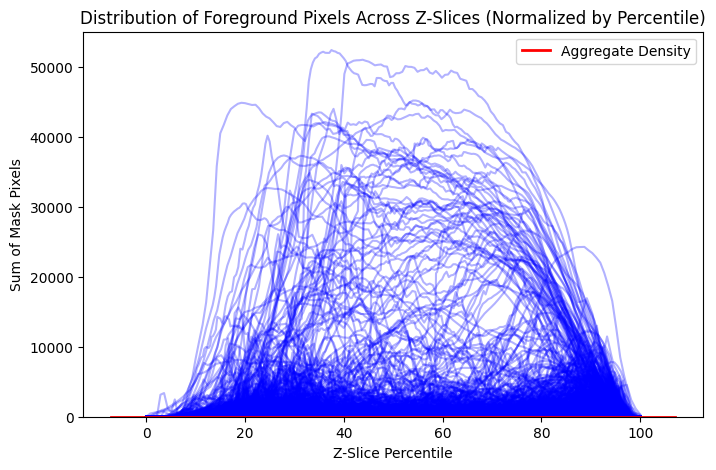

In [ ]:
plt.figure(figsize=(8, 5))

for z_percentiles, z_sums in all_distributions:
    sns.lineplot(x=z_percentiles, y=z_sums, alpha=0.3, color='blue')

all_z_percentiles = np.concatenate([dist[0] for dist in all_distributions])
all_z_sums = np.concatenate([dist[1] for dist in all_distributions])
sns.kdeplot(x=all_z_percentiles, weights=all_z_sums, color='red', linewidth=2, label="Aggregate Density")

plt.xlabel("Z-Slice Percentile")
plt.ylabel("Sum of Mask Pixels")
plt.title("Distribution of Foreground Pixels Across Z-Slices (Normalized by Percentile)")
plt.legend()
plt.show()